In [13]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from code.evaluation import (compute_horizon_degradation_metrics,
                             plot_forecast_degradation,
                             plot_selected_horizons,
                             plot_forecast_trajectory,
                             compute_forecast_metrics)

from code.data_utils import clean_actual_data, clean_forecast_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
actual = pd.read_csv(r'../data/explore/inst_load.csv')
forecast = pd.read_csv(r'../data/explore/very_short_load_frcst.csv')

In [15]:
actual_df = clean_actual_data(actual)
forecast_df = clean_forecast_data(forecast)

In [16]:
actual_df

,timestamp,load
17,2025-05-19 03:55:00,74915.21
42,2025-05-19 03:50:00,75235.05
67,2025-05-19 03:45:01,75399.86
92,2025-05-19 03:40:00,75790.34
117,2025-05-19 03:35:00,76269.06
...,...,...
7067,2025-05-18 04:25:00,75888.00
7092,2025-05-18 04:20:00,76117.32
7117,2025-05-18 04:15:00,76637.16
7142,2025-05-18 04:10:01,76719.06


In [17]:
forecast_df

,issued_at,target_time,forecast_load,horizon
184,2025-05-19 03:55:00,2025-05-19 03:55:00,74620.0,0
185,2025-05-19 03:55:00,2025-05-19 04:00:00,74270.0,1
186,2025-05-19 03:55:00,2025-05-19 04:05:00,73931.0,2
187,2025-05-19 03:55:00,2025-05-19 04:10:00,73601.0,3
188,2025-05-19 03:55:00,2025-05-19 04:15:00,73282.0,4
...,...,...,...,...
172140,2025-05-18 04:05:00,2025-05-18 05:40:00,73499.0,19
172141,2025-05-18 04:05:00,2025-05-18 05:45:00,73281.0,20
172142,2025-05-18 04:05:00,2025-05-18 05:50:00,73067.0,21
172143,2025-05-18 04:05:00,2025-05-18 05:55:00,72861.0,22


In [19]:
df_metrics = compute_horizon_degradation_metrics(actual_df, forecast_df)
df_metrics

,horizon,MAE,MSE,RMSE,MAPE (%),SMAPE (%)
0,0,117.803378,2.330487e+04,152.659328,0.152489,0.152436
1,1,268.936752,1.009094e+05,317.662442,0.348399,0.348422
2,2,436.226059,2.587716e+05,508.695937,0.565040,0.565255
3,3,605.695299,4.976574e+05,705.448354,0.784355,0.784883
4,4,774.638923,8.175629e+05,904.191852,1.002812,1.003769
5,5,944.004776,1.218552e+06,1103.880254,1.221705,1.223200
6,6,1115.693975,1.701950e+06,1304.587883,1.443521,1.445664
7,7,1288.416205,2.265356e+06,1505.110124,1.666553,1.669452
8,8,1461.266379,2.908639e+06,1705.473197,1.889616,1.893373
9,9,1633.841571,3.631232e+06,1905.579163,2.112190,2.116902


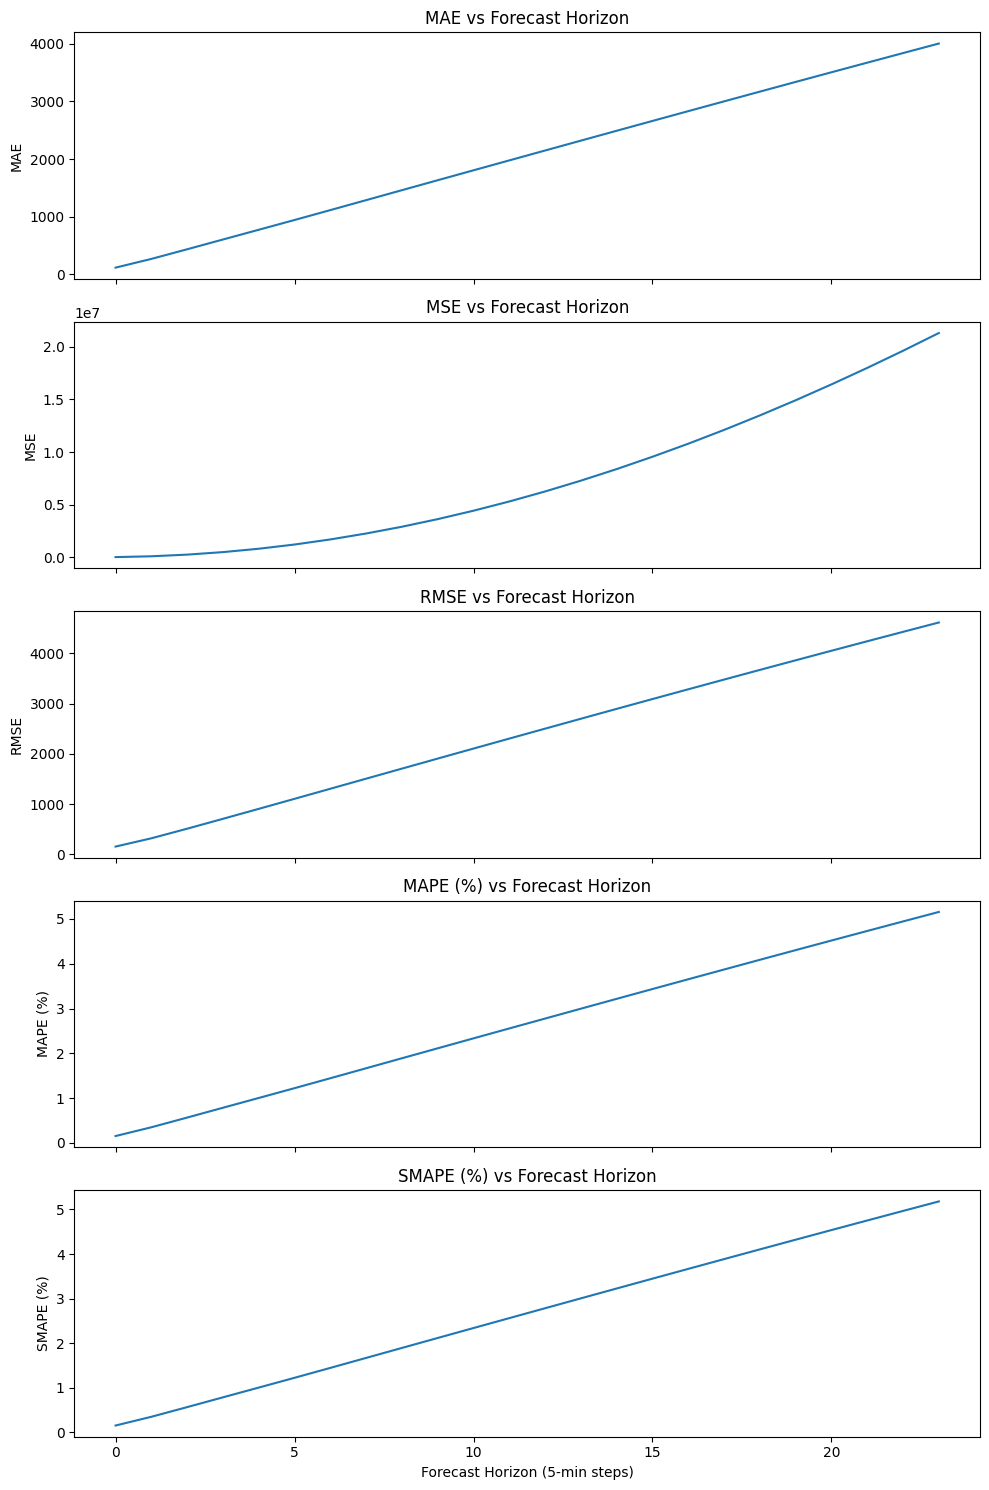

In [20]:
plot_forecast_degradation(df_metrics)

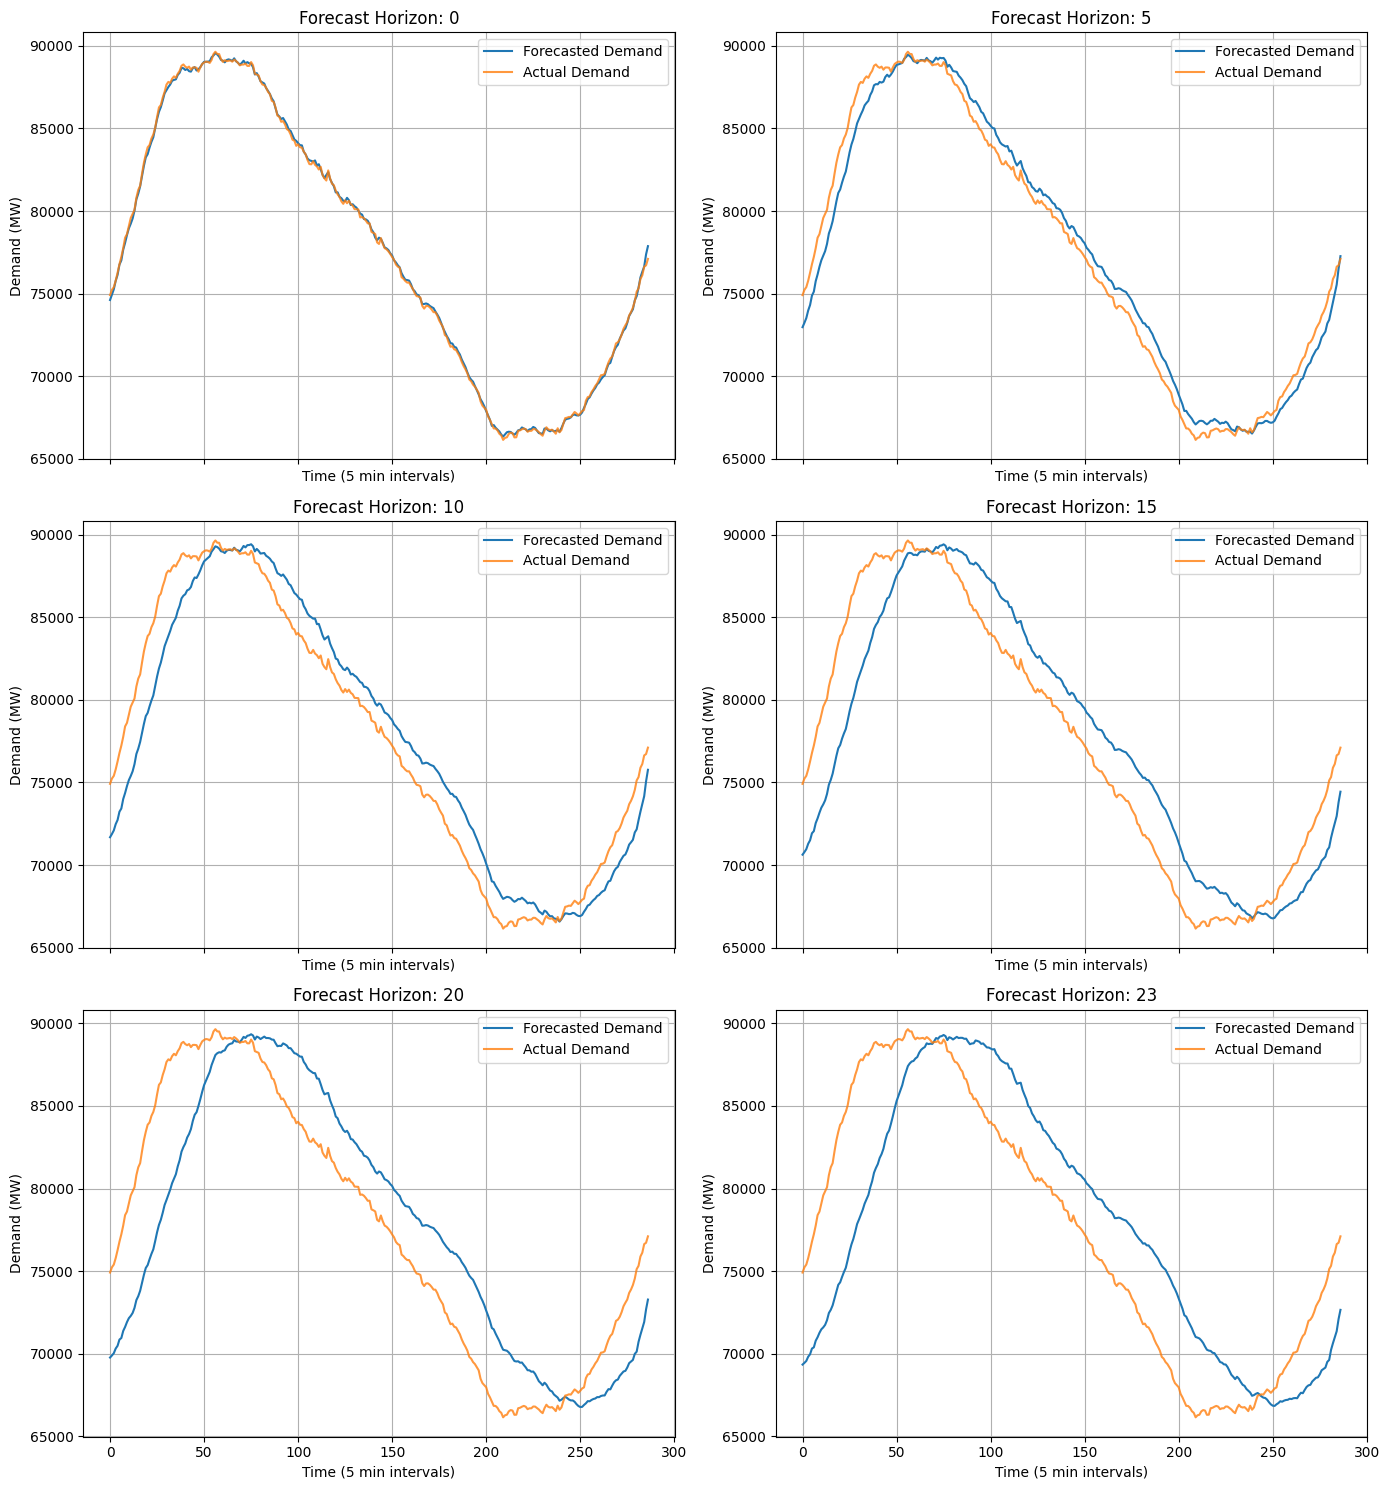

In [21]:
plot_selected_horizons(actual_df, forecast_df)

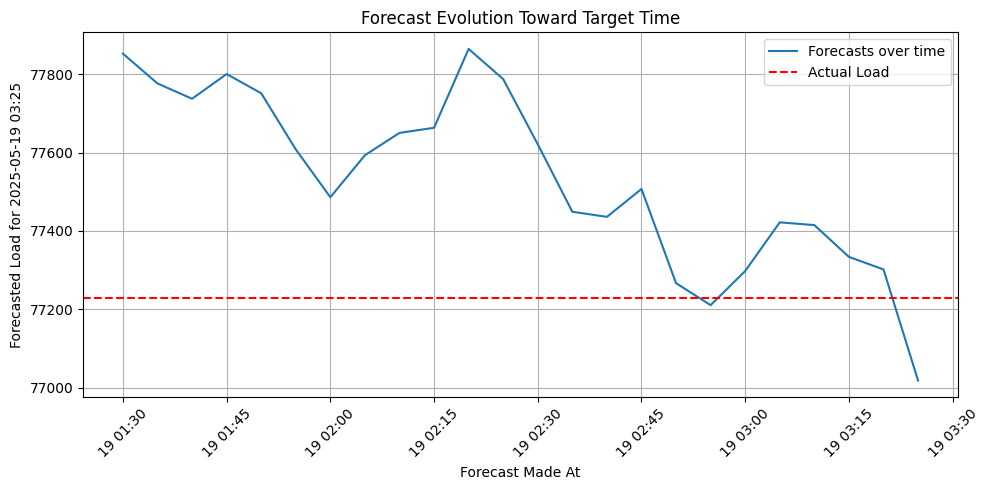

In [22]:
target_time = pd.Timestamp("2025-05-19 03:25:00")
plot_forecast_trajectory(actual_df, forecast_df, target_time)